In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
train_df = pd.read_csv('../../datasets/training_2nd_dataset.csv')
icc_cl = pd.read_csv('../../datasets/ICC_cleaned.csv')

In [3]:
# 'NoStalling' to 0; 'MildStalling' to 1; 'SevereStalling'2;
train_df['myStallLabel'] = train_df['buffer_rate'].apply(lambda x: 0 if x <= 0 else 2 if x > 0.1 else 1)
icc_cl['myStallLabel'] = icc_cl['StallLabel'].apply(lambda x: 0 if x <= 0 else 2 if x > 0.1 else 1)

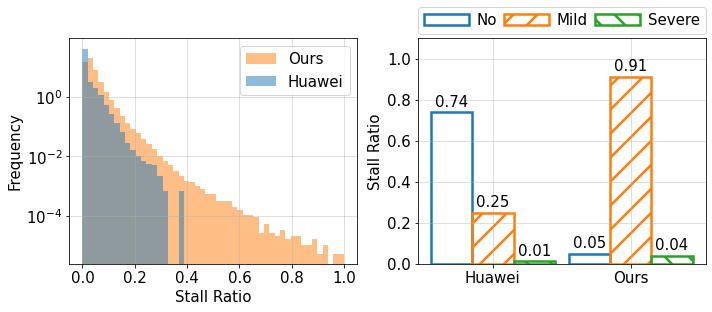

In [4]:
fig, axs = plt.subplots(1, 2,figsize = (10, 4))
ax1 = axs[0]
bins = np.linspace(0, 1, 50)
ax1.hist(train_df['buffer_rate'].values,bins, alpha=0.5,label="Ours", density=True, color='tab:orange')
ax1.hist(icc_cl['StallLabel'].values, bins,alpha=0.5,label="Huawei", density=True, color='tab:blue')
ax1.grid(alpha=0.5)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_yscale('log')
ax1.set_xlabel('Stall Ratio' , fontsize=15)
ax1.set_ylabel('Frequency', fontsize=15)
ax1.legend(fontsize=15)
ax1.yaxis.offsetText.set_fontsize(15)

plt.rcParams['hatch.linewidth'] = 2.5
ax0 = axs[1]
labels = ['Huawei', 'Ours']
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

nostalls = []
midstalls = []
severestalls = []

nostalls.append(sum(icc_cl['myStallLabel'] == 0)/len(icc_cl))
midstalls.append(sum(icc_cl['myStallLabel'] == 1)/len(icc_cl))
severestalls.append(sum(icc_cl['myStallLabel'] == 2)/len(icc_cl))

nostalls.append(sum(train_df['myStallLabel'] == 0)/len(train_df))
midstalls.append(sum(train_df['myStallLabel'] == 1)/len(train_df))
severestalls.append(sum(train_df['myStallLabel'] == 2)/len(train_df))

rects0 = ax0.bar(x - width, nostalls, width, label='No',linewidth=2.5,color='none', edgecolor=['#1f77b4','#1f77b4'], hatch=['',''])
rects1 = ax0.bar(x , midstalls, width, label='Mild',linewidth=2.5,color='none', edgecolor=['#ff7f0e','#ff7f0e'], hatch=['/','/'])
rects2 = ax0.bar(x + width, severestalls, width, label='Severe',linewidth=2.5,color='none', edgecolor=['#2ca02c','#2ca02c'], hatch=['\\','\\'])


# ax.set_title('Scores by group and gender')
ax0.set_xticks(x, labels)
ax0.bar_label(rects0, fmt='%.2f',padding=3, fontsize=15)
ax0.bar_label(rects1, fmt='%.2f',padding=3, fontsize=15)
ax0.bar_label(rects2, fmt='%.2f',padding=3, fontsize=15)
# ax.legend(fontsize=15)
ax0.grid(alpha=0.5)
ax0.tick_params(axis='both', which='major', labelsize=15)
ax0.set_ylabel('Stall Ratio', fontsize=15)
ax0.set_ylim(top=1.1)


handles, labels = ax0.get_legend_handles_labels()

fig.tight_layout()
s = fig.subplotpars
wid = s.right-s.left
bb=[s.left+wid/2+0.0425, s.top+0.06, wid/2-0.0425, 0.05]
leg = fig.legend(handles, labels, bbox_to_anchor=bb, mode="expand", borderaxespad=0, bbox_transform=fig.transFigure, 
                 handlelength=3, ncol=4, fontsize=15,handletextpad=0.5)

fig.tight_layout()
# fig.savefig('../../latex/pvldbstyle-master/figures/stallratio_comparation.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')